# Module 7: Merging, Joining and Concatenating

In this module, we will learn how to join, merge and concatenate multiple DataFrame using different methods. This is just like working with SQL where we combine different sources based on unique values.


In [1]:
import pandas as pd

- **Customer ID**  : unique number give to each customer
- **Food ID** : unique number for each food
This dataset shows food which the customers bought in Week 1.

### Week 1 Dataset

In [2]:
week1 = pd.read_csv("data/Restaurant - Week 1 Sales.csv")
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


### Week 2 Dataset
The same structure as the above dataFrame. This is data for 2nd week.

In [3]:
week2 = pd.read_csv("data/Restaurant - Week 2 Sales.csv")
week2.head(3)

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10


### Foods Dataset

This dataset is storing information about each food. It includes food names and prices.

In [4]:
foods = pd.read_csv("data/Restaurant - Foods.csv")
foods.head(3)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99


### Customer Dataset

This dataset stores information about customers. The ID in this dataset will be used as a key to link with other datasets.

In [5]:
customers = pd.read_csv("data/Restaurant - Customers.csv")
customers.head(3)

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive


### 1. pd.concat() method

Since week1 comes before week2, then week2 dataset will be appended to week1.
After applying the concat method, notice that the last index number is 249, even though we have 500 rows. This is because Pandas use the original index number. We can solve this by setting the **ignore_index parameter** to true.

In [6]:
len(pd.concat([week1,week2]))

500

In [7]:
pd.concat([week1,week2])

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [8]:
df = pd.concat([week1,week2], ignore_index=True)
df

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


In [9]:
pd.concat([week1,week2], ignore_index=True)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


**keys parameter** enables us to label the dataset that we concat /combine.
It creates a MultiIndex DataFrame in which the first index is the keys and the second index is the original index.

In [10]:
sales = pd.concat([week1,week2], keys=["Week 1","Week 2"])
sales

Customer ID  Food ID
Week 1 0            537        9
       1             97        4
       2            658        1
       3            202        2
       4            155        9
...                 ...      ...
Week 2 245          783       10
       246          556       10
       247          547        9
       248          252        9
       249          249        6

[500 rows x 2 columns]

Since it is multi-index, we can access it with tuple.

In [11]:
sales.loc[("Week 2" , 249)]

Customer ID    249
Food ID          6
Name: (Week 2, 249), dtype: int64

### 2. Append() method
Appends rows of other DataFrame to the end of the given DataFrame, returning a new DataFrame object

It produces the same output as concat() method. **.append()** method also has **ignore_index parameters**.

In [12]:
week1.append(week2, ignore_index=True).head(15)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
5,213,8
6,600,1
7,503,5
8,71,3
9,174,3


### 3. Inner join



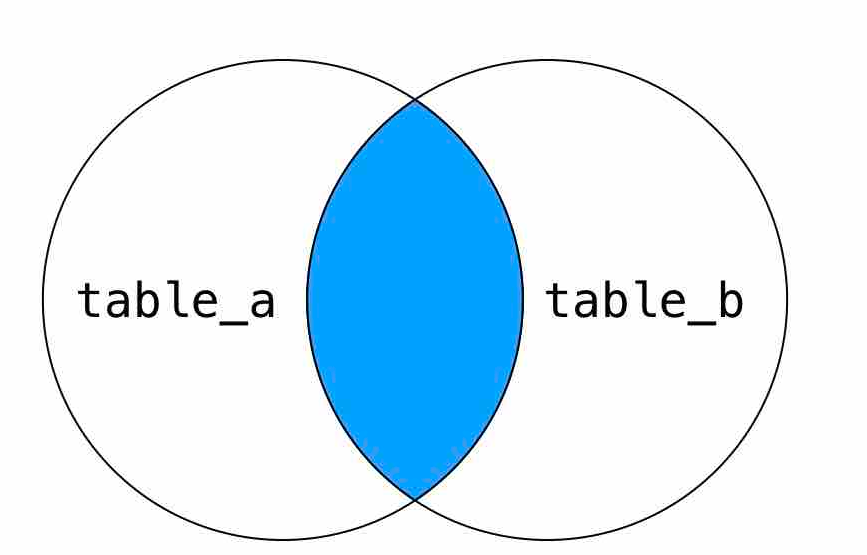

As shown in the image above, inner join returns the intersection of two datasets. The intersection is the universal reference point(s) or key that is shared by the two datasets.

This join can be created by using the **merge()** method.

- **left** parameter : the first table
- **right** parameter : the second table
- **on** : the reference point or key
- **how** parameter : the method. Here, we specify inner. (We will learn about outer, left and right soon)
- **suffixes** parameter : Suffix to apply to overlapping column names in the left and right side, respectively

In [13]:
df= pd.merge(left=week1, right=week2, how="inner", on="Customer ID", suffixes=[" - Week 1", " - Week 2"])
df

,Customer ID,Food ID - Week 1,Food ID - Week 2
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


If you notice, there are two rows with Customer ID of 155 in the new DataFrame.
This is because these rows existed in Week 1 dataset which means Customer 155 came twice in week 1. Hence, when we do inner join, it will duplicate the value.

In [14]:
df.head()

,Customer ID,Food ID - Week 1,Food ID - Week 2
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9


In [15]:
week1[week1["Customer ID"] == 155]

,Customer ID,Food ID
4,155,9
17,155,1


In [16]:
week2[week2["Customer ID"] == 155]

,Customer ID,Food ID
208,155,3


**Extract customers who came on both weeks and bought the same food**

In [17]:
pd.merge(left=week1, right=week2, how="inner" , on=["Customer ID" , "Food ID"])

,Customer ID,Food ID
0,304,3
1,540,3
2,937,10
3,233,3
4,21,4
5,21,4
6,922,1
7,578,5
8,578,5


However, we can still see some duplicates in the DataFrame (Customer 21 and 578). Why?

*Answer: These customers came twice either in Week 1 or Week 2. Try to extract the data from weeks 1 and 2 and compare them. You will understand more!*

### 4. Outer Joins
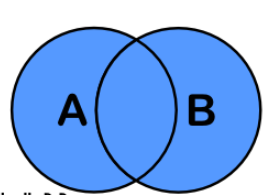

Combine both datasets at one reference point

- **how** : outer, because we want to do outer join.
- **indicator** : represents which table the data belongs to.

In [18]:
merged = pd.merge(left=week1, right=week2, how="outer",on="Customer ID", suffixes=[" - Week 1", " - Week 2"], indicator=True)
merged.head(15)

,Customer ID,Food ID - Week 1,Food ID - Week 2,_merge
0,537,9.0,5.0,both
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
4,155,9.0,3.0,both
5,155,1.0,3.0,both
6,213,8.0,NaN,left_only
7,600,1.0,NaN,left_only
8,503,5.0,8.0,both
9,503,5.0,9.0,both


### Outer Joins with exception
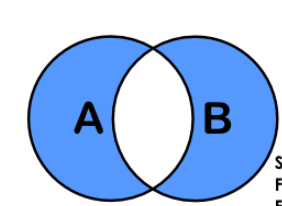

As shown in the diagram, it combines the datasets except the middle part (intersection part).

In [19]:
mask = merged["_merge"].isin(["right_only" , "left_only"])
merged[mask]

,Customer ID,Food ID - Week 1,Food ID - Week 2,_merge
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
6,213,8.0,NaN,left_only
7,600,1.0,NaN,left_only
...,...,...,...,...
449,855,NaN,4.0,right_only
450,559,NaN,10.0,right_only
451,276,NaN,4.0,right_only
452,556,NaN,10.0,right_only


Another technique to do Outer Join without taking intersection :

In [20]:
mask = merged["_merge"] != "both"
merged[mask]

,Customer ID,Food ID - Week 1,Food ID - Week 2,_merge
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
6,213,8.0,NaN,left_only
7,600,1.0,NaN,left_only
...,...,...,...,...
449,855,NaN,4.0,right_only
450,559,NaN,10.0,right_only
451,276,NaN,4.0,right_only
452,556,NaN,10.0,right_only


### 5. Left Joins

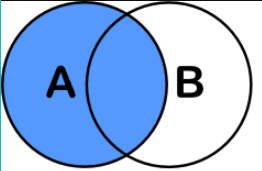

Focus on one DataFrame and include the intersection of the second DataFrame.

In [21]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [22]:
foods.head(3)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99


Let's combine both of the tables.

Now, we can identify the name of the food the customers ate.

In [23]:
df = pd.merge(left=week1, right=foods, how="left", on="Food ID")
df

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99
...,...,...,...,...
245,413,9,Donut,0.99
246,926,6,Pasta,13.99
247,134,3,Taco,2.99
248,396,6,Pasta,13.99


In the **merge() method,** we have additional parameter which is called **sort**. By default it is set to False. If it is True, it will sort the keys in ascending order.

In [24]:
pd.merge(left=week1, right=foods,how="left", on="Food ID", sort=True)

,Customer ID,Food ID,Food Item,Price
0,658,1,Sushi,3.99
1,600,1,Sushi,3.99
2,155,1,Sushi,3.99
3,341,1,Sushi,3.99
4,20,1,Sushi,3.99
...,...,...,...,...
245,809,10,Drink,1.75
246,584,10,Drink,1.75
247,274,10,Drink,1.75
248,151,10,Drink,1.75


### 6.  Right Join

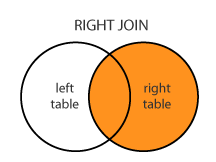



Combine the two tables on a specific key. Only data on the intersection and right table will be taken. It is the same as Left Join, but in a different direction.

Let's use the right join to get the customers' information.

First, we have to rename the key column because in Customers dataset, its name is ID while in our new DataFrame, the key column name is Customer ID.

In [25]:
customers.head(3)

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive


In [26]:
df.head(3)

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99


In [27]:
df.columns = ['ID', 'Food ID', 'Food Item', 'Price']

In [28]:
pd.merge(left=customers, right=df, on="ID", how="right").head()

,ID,First Name,Last Name,Gender,Company,Occupation,Food ID,Food Item,Price
0,3,Roger,Black,Male,Tagfeed,Account Executive,2,Burrito,9.99
1,10,Steven,Ryan,Male,Twinder,Community Outreach Specialist,2,Burrito,9.99
2,20,Lisa,Rice,Female,Oloo,Programmer IV,1,Sushi,3.99
3,21,Albert,Burns,Male,Rhynoodle,Junior Executive,4,Quesadilla,4.25
4,21,Albert,Burns,Male,Rhynoodle,Junior Executive,4,Quesadilla,4.25


### 7. left_on and right_on Parameters

In the previous technique, we have to rename the column first before combining which is a tedious process. Without renaming the column, we can still combine them by specifying the column names on both left and right.

- **right_on** : Column or index level names to join on in the right DataFrame.

- **left_on** : Use the index from the left DataFrame as the join key(s).

In [29]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [30]:
customers.head(3)

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive


In [31]:
pd.merge(left=customers, right=week1, left_on="ID", right_on="Customer ID", sort=True).head()

,ID,First Name,Last Name,Gender,Company,Occupation,Customer ID,Food ID
0,3,Roger,Black,Male,Tagfeed,Account Executive,3,2
1,10,Steven,Ryan,Male,Twinder,Community Outreach Specialist,10,2
2,20,Lisa,Rice,Female,Oloo,Programmer IV,20,1
3,21,Albert,Burns,Male,Rhynoodle,Junior Executive,21,4
4,21,Albert,Burns,Male,Rhynoodle,Junior Executive,21,4


ID column and Customer ID column are the same thing. After merging, Pandas will include both of them in the new DataFrame. We do not need to keep both as they are similar hence, we should drop any one of them.

In [32]:
pd.merge(left=customers, right=week1, left_on="ID", right_on="Customer ID", sort=True).drop("ID", axis="columns")

,First Name,Last Name,Gender,Company,Occupation,Customer ID,Food ID
0,Roger,Black,Male,Tagfeed,Account Executive,3,2
1,Steven,Ryan,Male,Twinder,Community Outreach Specialist,10,2
2,Lisa,Rice,Female,Oloo,Programmer IV,20,1
3,Albert,Burns,Male,Rhynoodle,Junior Executive,21,4
4,Albert,Burns,Male,Rhynoodle,Junior Executive,21,4
...,...,...,...,...,...,...,...
245,Robert,Ford,Male,Jabbertype,Account Representative IV,966,5
246,Teresa,Reynolds,Female,Flashdog,Budget/Accounting Analyst IV,968,1
247,Julia,Ortiz,Female,Kwideo,Structural Analysis Engineer,985,5
248,Melissa,Wells,Female,Lazzy,Senior Sales Associate,991,2


### 8. Merging two dataFrame base on Index

In merge() method, there are right_index and left_index parameters. Set them to True to do merging using the particular index as the reference point.

In [33]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [34]:
foods = pd.read_csv("data/Restaurant - Foods.csv", index_col="Food ID")
foods.head(3)

,Food Item,Price
Food ID,,
1,Sushi,3.99
2,Burrito,9.99
3,Taco,2.99


Here, we are not using the on parameter. Instead, I specify the **left_on** parameter and set the **right_index** parameter to True.

In [35]:
pd.merge(left=week1, right=foods, how="left", left_on="Food ID", right_index=True)

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99
...,...,...,...,...
245,413,9,Donut,0.99
246,926,6,Pasta,13.99
247,134,3,Taco,2.99
248,396,6,Pasta,13.99


### 9 .join() method

It works the same as merge() method.
We can join the table on the reference point(s).

In [36]:
satisfaction = pd.read_csv("data/Restaurant - Week 1 Satisfaction.csv")
satisfaction.head()

,Satisfaction Rating
0,2
1,7
2,3
3,7
4,10


In [37]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [38]:
week1.join(satisfaction).head()

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10


Using the merge() method, we can also get the same output. However, merge() method **requires more parameters.**

In [39]:
pd.merge(left=week1, right=satisfaction, left_index=True, right_index=True)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


### 10. SQL command in Pandas

To use the SQL command in Pandas, we need additional library called **PandasSQL**. 
https://pypi.org/project/pandasql/

You can install it using this command: *pip install pandasql*

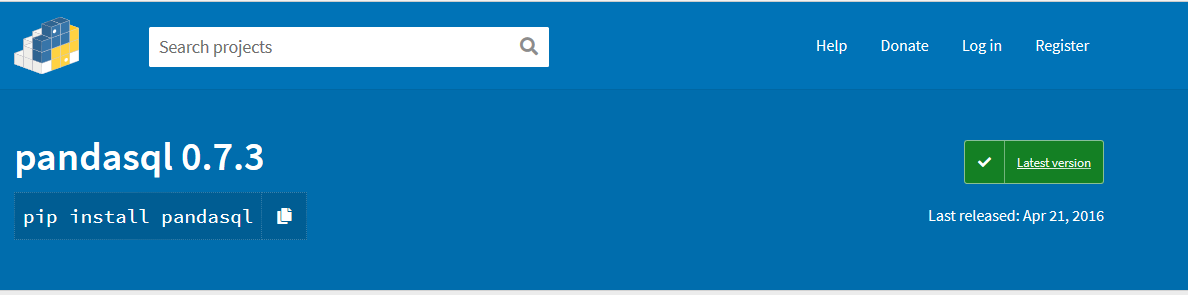

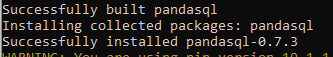

Once the library installation is completed, you can import the library inside Jupyter Notebook.

In [40]:
import pandasql as ps

We use **sqldf() function** to do query by passing SQL Query in string format.
For example, we want to select all columns in the food table. The query is as follows:

**SELECT   *   from foods**


In [41]:
ps.sqldf("SELECT * from foods").head(5)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49


### Inner Join with SQL Query.

Let's join Week1 and Week2 table using Customer ID as the primary key. 

In [42]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [43]:
week2.head(3)

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10


We can combine the table using Customer ID as the key. However, the key name contains space which we need to replace with underscore ( _ ).

In [44]:
week1.columns = ["Customer_ID" , "Food_ID"]
week2.columns = ["Customer_ID" , "Food_ID"]

If we want to do the Inner join using SQL Command, the query is as follows:

**SELECT * FROM week1  INNER JOIN week2 ON week1.Customer_ID = week2.Customer_ID**

The query yields the same result as using Pandas Merge() function. If you are familiar with SQL commands, this library will help you a lot. 

In [45]:
ps.sqldf("SELECT * FROM week1  INNER JOIN week2 ON week1.Customer_ID = week2.Customer_ID").head(5)

,Customer_ID,Food_ID,Customer_ID,Food_ID
0,537,9,537,5
1,155,9,155,3
2,503,5,503,8
3,503,5,503,9
4,155,1,155,3
